In [5]:
import csv
import numpy as np
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline  

0.625794491525
 
0.9877 x + 0.009448
full top 10 prag:0.527636 baseline: 0.486565
full top 20 prag:0.497749 baseline: 0.478575
full top 50 prag:0.458506 baseline: 0.448988
full top 100 prag:0.338499 baseline: 0.333145
0.549781120216
 
1.015 x + 0.01751
half top 10 prag:0.437476 baseline: 0.387227
half top 20 prag:0.427901 baseline: 0.383677
half top 50 prag:0.396721 baseline: 0.360046
half top 100 prag:0.292463 baseline: 0.270894
0.486666666667
 
0.9104 x + 0.0217
mem top 10 prag:0.249671 baseline: 0.253850
mem top 20 prag:0.244533 baseline: 0.245761
mem top 50 prag:0.229013 baseline: 0.225360
mem top 100 prag:0.182286 baseline: 0.176401


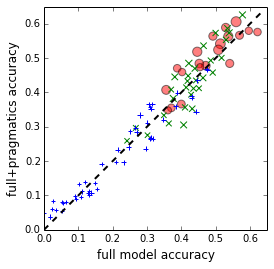

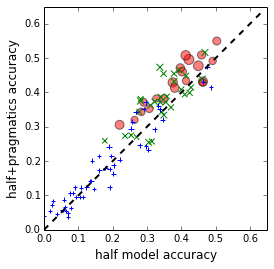

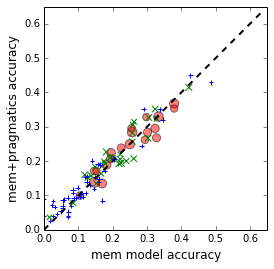

In [9]:
def plot_accuracies(filename, tag, xlabel='base', ylabel='+prag'):
    rows = []; means = []; means_baseline = [];
    with open(filename, 'rb') as csvfile:
         spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
         for row in spamreader:
            rows += [row]
            means += [float(row[1])]
            means_baseline += [float(row[3])]
    plt.figure()
    #plt.subplot(211)
    
    colors = [2000/(i+20) for i in range(100)];
    #plt.scatter(means_baseline[0:], means[0:], s=colors, alpha=0.8, c='r')
    plt.scatter(means_baseline[0:20], means[0:20], s=colors[0:20], alpha=0.5, c='r')
    plt.scatter(means_baseline[20:50], means[20:50], s=colors[20:50], alpha=1, c='g', marker='x')
    plt.scatter(means_baseline[50:], means[50:], s=colors[50:], alpha=1, c='b', marker='+')
    ax = plt.gca()
    #ax.grid(True)
    minrange = min(means+means_baseline)
    maxrange = max(means+means_baseline)
    print maxrange
    mar = 0.01

    #plt.xlim(minrange-mar, maxrange+mar)
    #plt.xticks(())
    #plt.ylim(minrange-mar, maxrange+mar)
    #plt.yticks(())
    #plt.title('', fontsize=10)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(0, 0.65)
    plt.ylim(0, 0.65)
    
    p1 = np.poly1d(np.polyfit(means_baseline, means, 1))
    xp = np.linspace(0, 0.65, 300)
    #plt.plot(xp, p1(xp), '--', c='k', linewidth=1);
    print p1
    plt.gca().set_aspect('equal', adjustable='box')
    
    line = np.arange(0, 0.65, 0.01)
    plt.plot(line, line, c='k', linestyle='--', linewidth=2)
    
    plt.savefig('pragscatterall_%s.pdf' % tag,  bbox_inches="tight")
    plt.savefig('pragscatterall_%s.png' % tag,  bbox_inches="tight")
    prev = 0;
    for acccutoff in [10,20,50,100]:
        meanprag = sum(means[prev:acccutoff])/float(len(means[prev:acccutoff]))
        meanbase = sum(means_baseline[prev:acccutoff])/float(len(means[prev:acccutoff]))
        print '%s top %d prag:%f baseline: %f' % (tag, acccutoff, meanprag, meanbase)
        prev = 0
    return
    
    
plot_accuracies('summary/all99turkers.correct.mean.full', 'full', xlabel='full model accuracy', ylabel='full+pragmatics accuracy')
plot_accuracies('summary/all99turkers.correct.mean.half', 'half', xlabel='half model accuracy', ylabel='half+pragmatics accuracy')
plot_accuracies('summary/all99turkers.correct.mean.mem', 'mem', xlabel='mem model accuracy', ylabel='mem+pragmatics accuracy')


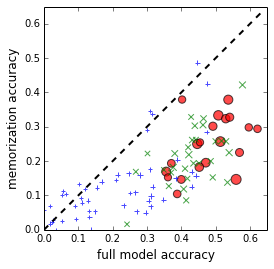

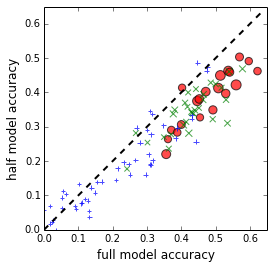

In [10]:
#all99turkers.correct.mean
#top20turker.correct.mean
def plot_accuracies(filenamex, filenamey, ylabel='y label', fname='twoaccs.pdf'):
    rows = []; means = []; means_baseline = [];
    with open(filenamex, 'rb') as csvfile:
         spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
         for row in spamreader:
            rows += [row]
            means_baseline += [float(row[3])]
            
    with open(filenamey, 'rb') as csvfile:
         spamreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
         for row in spamreader:
            rows += [row]
            means += [float(row[3])]
    plt.figure()
    #plt.subplot(211)
    
    colors = [2000/(i+20) for i in range(100)];
    #plt.scatter(means_baseline[0:], means[0:], s=colors, alpha=0.8, c='r')
    plt.scatter(means_baseline[0:20], means[0:20], s=colors[0:20], alpha=0.7, c='r')
    plt.scatter(means_baseline[20:50], means[20:50], s=colors[20:50], alpha=0.7, c='g', marker='x')
    plt.scatter(means_baseline[50:], means[50:], s=colors[50:], alpha=0.7, c='b', marker='+')
    ax = plt.gca()
    #ax.grid(True)
    minrange = min(means+means_baseline)
    maxrange = max(means+means_baseline)
    
    mar = 0.01

    #plt.xlim(minrange-mar, maxrange+mar)
    #plt.xticks(())
    #plt.ylim(minrange-mar, maxrange+mar)
    #plt.yticks(())
    #plt.title('', fontsize=10)
    plt.xlabel('full model accuracy', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(0, 0.65)
    plt.ylim(0, 0.65)
    plt.gca().set_aspect('equal', adjustable='box')
    
    line = np.arange(0, 0.65, 0.01)
    plt.plot(line, line, c='k', linestyle='--', linewidth=2)
    
    plt.savefig(fname + '.pdf',  bbox_inches="tight")
    plt.savefig(fname + '.png',  bbox_inches="tight")

plot_accuracies('summary/all99turkers.correct.mean.full', 'summary/all99turkers.correct.mean.mem', 'memorization accuracy', 'fullvsmem')
plot_accuracies('summary/all99turkers.correct.mean.full', 'summary/all99turkers.correct.mean.half', 'half model accuracy', 'fullvshalf')
